In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV,ElasticNetCV,LassoCV,RidgeCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings

warnings.filterwarnings(action='ignore')

In [3]:
#Loading data in pandas
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data',
names = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

### Basic dataframe details and stats

----

In [4]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#Getting an idea of total records and feature in dataframe
df.shape

(32561, 15)

In [6]:
#Checking datatypes and no of null values in df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
#Getting basic stats for numerical feature
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
#Checking if any null values are present per column/feature
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

***NULL values are not present in this data, hence no need for imputation techniques.***

### Exploratory Data Analysis

1. ***Exploring categorical features and checking how can same be converted to numrical features***

In [9]:
#Custom Function for one hot encoding and after operations
def custom_encoding(df,col):
    dummies=pd.get_dummies(df[col],drop_first=True)
    df=df.drop(col,axis=1)
    df=pd.concat([df,dummies],axis=1)
    return df

In [10]:
#Feature: workclass

In [11]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [12]:
df.workclass=df.workclass.str.strip()

**Found ? in many rows hence replacing the same with NaN for now.**

In [13]:
for x in ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','salary']:
    df[x]=df[x].str.strip()
    df[x]=df[x].replace(' ','')

In [14]:
df=df.replace('?',np.nan).dropna()

In [15]:
df.shape

(30162, 15)

In [16]:
df['workclass'].isna().sum()

0

<AxesSubplot:xlabel='workclass', ylabel='count'>

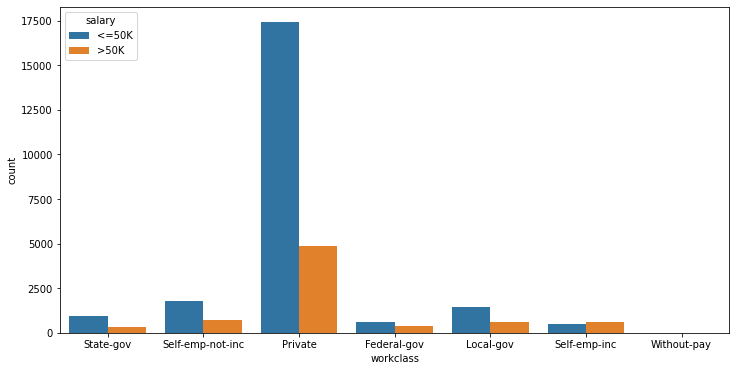

In [17]:
plt.figure(figsize=(12,6))
sns.countplot('workclass',data=df,hue='salary')

In [18]:
df=custom_encoding(df,'workclass')

In [19]:
df.columns

Index(['age', 'fnlwgt', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary',
       'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov',
       'Without-pay'],
      dtype='object')

In [20]:
# Dependent Feature: salary

In [21]:
df['salary'].value_counts()

<=50K    22654
>50K      7508
Name: salary, dtype: int64

<AxesSubplot:xlabel='salary', ylabel='count'>

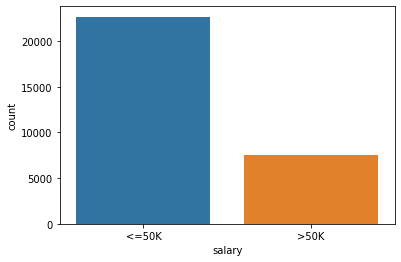

In [22]:
sns.countplot('salary',data=df)

**Seems like the dataset is imbalanced.**

In [23]:
#df.to_csv('tmp.csv',index=False)

In [24]:
df['salary']=df['salary'].map({'<=50K':1,'>50K':0})

In [25]:
# Feature: education & education-num

In [26]:
df['education'].value_counts()

HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: education, dtype: int64

In [27]:
df['education-num'].value_counts()

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education-num, dtype: int64

**Features education and education-num seems to be same dropping education column**

<AxesSubplot:xlabel='education', ylabel='count'>

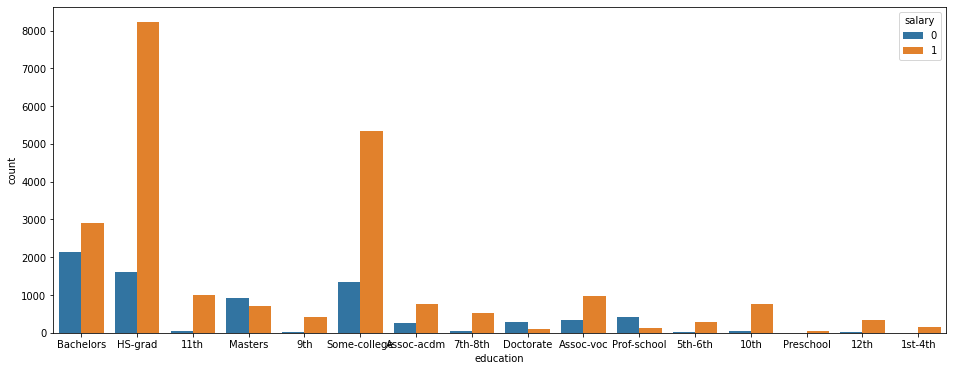

In [28]:
plt.figure(figsize=(16,6))
sns.countplot('education',data=df,hue='salary')

In [29]:
df=df.drop(columns=['education'])

In [30]:
#Feature: marital-status

In [31]:
df['marital-status'].value_counts()

Married-civ-spouse       14065
Never-married             9726
Divorced                  4214
Separated                  939
Widowed                    827
Married-spouse-absent      370
Married-AF-spouse           21
Name: marital-status, dtype: int64

<AxesSubplot:xlabel='marital-status', ylabel='count'>

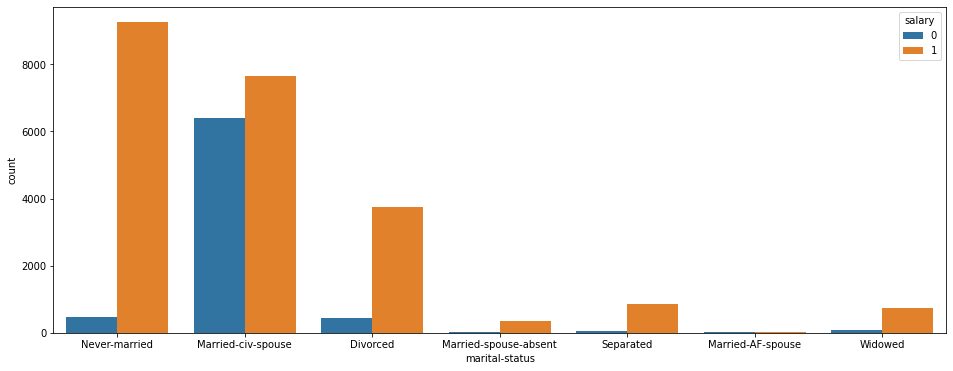

In [32]:
plt.figure(figsize=(16,6))
sns.countplot('marital-status',data=df,hue='salary')

In [33]:
df=custom_encoding(df,'marital-status')

In [34]:
# Feature:occupation

In [35]:
df['occupation'].value_counts()

Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
Sales                3584
Other-service        3212
Machine-op-inspct    1966
Transport-moving     1572
Handlers-cleaners    1350
Farming-fishing       989
Tech-support          912
Protective-serv       644
Priv-house-serv       143
Armed-Forces            9
Name: occupation, dtype: int64

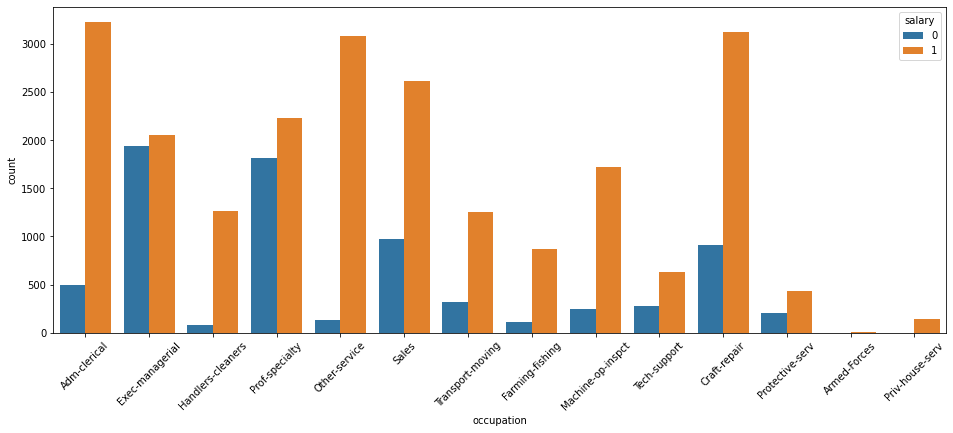

In [36]:
plt.figure(figsize=(16,6))
sns.countplot('occupation',data=df,hue='salary')
plt.xticks(rotation=45)
plt.show()

In [37]:
df=custom_encoding(df,'occupation')

In [38]:
# Feature: relationship

In [39]:
df['relationship'].value_counts()

Husband           12463
Not-in-family      7726
Own-child          4466
Unmarried          3212
Wife               1406
Other-relative      889
Name: relationship, dtype: int64

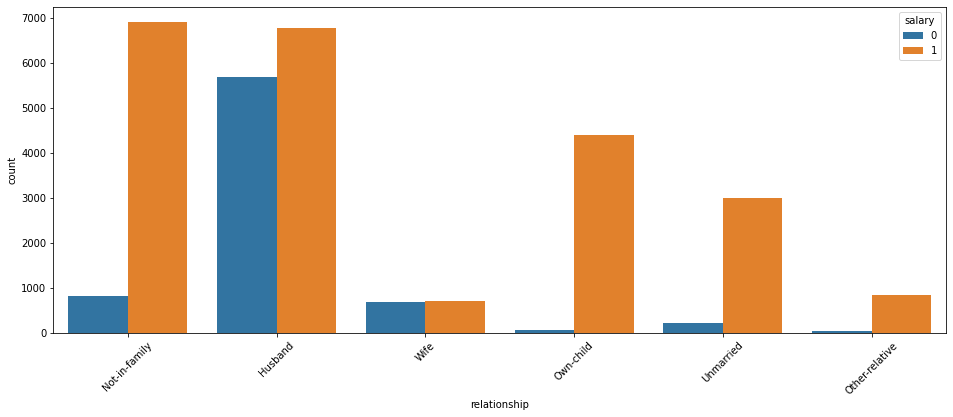

In [40]:
plt.figure(figsize=(16,6))
sns.countplot('relationship',data=df,hue='salary')
plt.xticks(rotation=45)
plt.show()

In [41]:
df=custom_encoding(df,'relationship')

In [42]:
# Feature:race

In [43]:
df['race'].value_counts()

White                 25933
Black                  2817
Asian-Pac-Islander      895
Amer-Indian-Eskimo      286
Other                   231
Name: race, dtype: int64

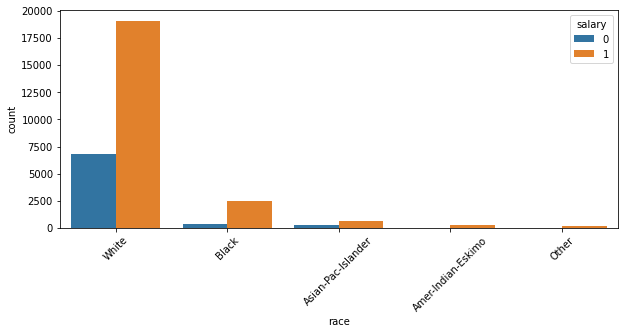

In [44]:
plt.figure(figsize=(10,4))
sns.countplot('race',data=df,hue='salary')
plt.xticks(rotation=45)
plt.show()

In [45]:
df=custom_encoding(df,'race')

In [46]:
#Feature: sex

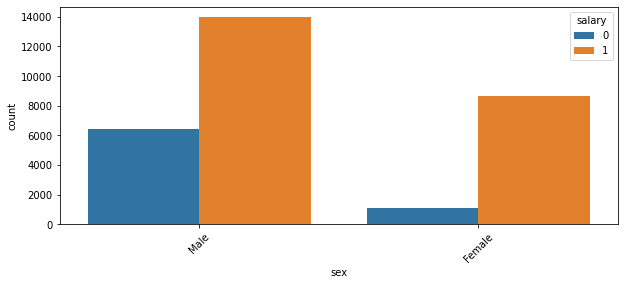

In [47]:
plt.figure(figsize=(10,4))
sns.countplot('sex',data=df,hue='salary')
plt.xticks(rotation=45)
plt.show()

In [48]:
df['sex']=df['sex'].map({'Male':0,'Female':1})

In [49]:
#Feature: native-country

In [50]:
df['native-country'].value_counts()

United-States                 27504
Mexico                          610
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
Italy                            68
China                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Poland                           56
Columbia                         56
Taiwan                           42
Iran                             42
Haiti                            42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                           29
Ecuador                     

In [51]:
df['native-country']=df['native-country'].apply(lambda x:'US' if('United-States' in x) else 'Non-US')

In [52]:
df['native-country'].value_counts()

US        27504
Non-US     2658
Name: native-country, dtype: int64

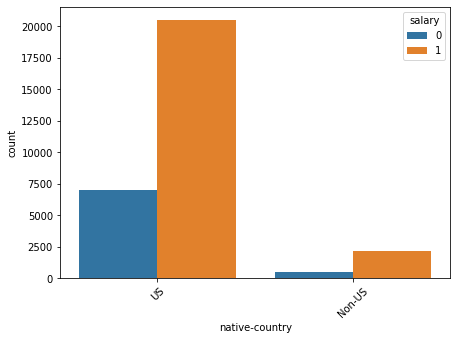

In [53]:
plt.figure(figsize=(7,5))
sns.countplot('native-country',data=df,hue='salary')
plt.xticks(rotation=45)
plt.show()

In [54]:
df['native-country']=df['native-country'].map({'US':0,'Non-US':1})

In [55]:
df.columns

Index(['age', 'fnlwgt', 'education-num', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'salary', 'Local-gov', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay',
       'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent',
       'Never-married', 'Separated', 'Widowed', 'Armed-Forces', 'Craft-repair',
       'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners',
       'Machine-op-inspct', 'Other-service', 'Priv-house-serv',
       'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support',
       'Transport-moving', 'Not-in-family', 'Other-relative', 'Own-child',
       'Unmarried', 'Wife', 'Asian-Pac-Islander', 'Black', 'Other', 'White'],
      dtype='object')

In [56]:
df.dtypes

age                      int64
fnlwgt                   int64
education-num            int64
sex                      int64
capital-gain             int64
capital-loss             int64
hours-per-week           int64
native-country           int64
salary                   int64
Local-gov                uint8
Private                  uint8
Self-emp-inc             uint8
Self-emp-not-inc         uint8
State-gov                uint8
Without-pay              uint8
Married-AF-spouse        uint8
Married-civ-spouse       uint8
Married-spouse-absent    uint8
Never-married            uint8
Separated                uint8
Widowed                  uint8
Armed-Forces             uint8
Craft-repair             uint8
Exec-managerial          uint8
Farming-fishing          uint8
Handlers-cleaners        uint8
Machine-op-inspct        uint8
Other-service            uint8
Priv-house-serv          uint8
Prof-specialty           uint8
Protective-serv          uint8
Sales                    uint8
Tech-sup

### Column Standardization

In [57]:
X=df.drop('salary',axis=1)
y=df['salary']

In [58]:
sc=StandardScaler()

In [59]:
tmp_scaled=sc.fit_transform(X[['age','fnlwgt','capital-gain','capital-loss','hours-per-week']])

In [60]:
X_tmp=X.copy()

In [61]:
X_tmp[['age','fnlwgt','capital-gain','capital-loss','hours-per-week']]=tmp_scaled

In [62]:
X_scaled=X_tmp.copy()

In [63]:
X_scaled.to_csv('scaled_tmp.csv',index=False)

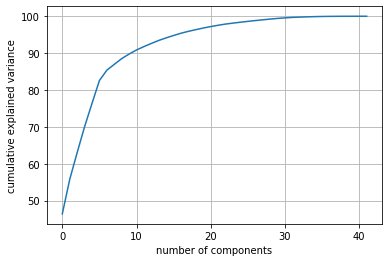

In [64]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_scaled)
#Plotting to get an idea regarding the count of components required to expained the variance
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### Splitting data using train_test_split

In [65]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=365)

In [66]:
x_train.shape

(22621, 42)

In [67]:
x_test.shape

(7541, 42)

### Logistic Regression

----

In [68]:
regression=LogisticRegression()

In [69]:
regression.fit(x_train,y_train)

LogisticRegression()

In [70]:
print('Coeff Values: ',regression.coef_)
print('Intercept Value: ',regression.intercept_)

Coeff Values:  [[-0.32529997 -0.067151   -0.27930344  0.89672472 -2.41812277 -0.24229805
  -0.3465811   0.22944893  0.54610463  0.46265061  0.28811619  0.93117141
   0.73915593  0.30617891 -0.48539628 -1.02065423 -0.01866667  0.49389899
   0.07115522 -0.13471943  0.08696393  0.04624239 -0.74155424  1.16522722
   0.85339304  0.37650996  0.81813632  0.57071986 -0.53904173 -0.57245545
  -0.21069211 -0.69867144  0.15929075  0.6336106   1.18483874  1.63672013
   0.85199352 -1.30371899  0.14029241  0.32592346  0.63169834  0.14946232]]
Intercept Value:  [3.61952956]


In [71]:
regression.score(x_train,y_train)

0.8479731223199681

In [72]:
regression.score(x_test,y_test)

0.8510807585200901

In [73]:
y_pred=regression.predict(x_test)

In [74]:
y_test

31565    1
15326    1
23763    0
31941    1
14139    1
        ..
16378    1
27319    1
7502     1
16579    1
30689    1
Name: salary, Length: 7541, dtype: int64

In [75]:
y_pred

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

**Model does not seems to be overfitting**

In [76]:
from sklearn.metrics import classification_report,log_loss,confusion_matrix

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67      1834
           1       0.88      0.92      0.90      5707

    accuracy                           0.85      7541
   macro avg       0.81      0.77      0.79      7541
weighted avg       0.85      0.85      0.85      7541



In [78]:
print(log_loss(y_test,y_pred))

5.143561863480152


In [79]:
print(confusion_matrix(y_test,y_pred))

[[1141  693]
 [ 430 5277]]


In [80]:
from sklearn.linear_model import SGDClassifier
sgdmodel=SGDClassifier(random_state=365)

In [81]:
regression.fit(x_train,y_train)

LogisticRegression()

In [82]:
print(regression.score(x_train,y_train))
print(regression.score(x_test,y_test))

0.8479731223199681
0.8510807585200901


In [83]:
#Hypertuning SGD Classifier

In [84]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
for x in alpha:
    sgdmodel=SGDClassifier(alpha=x,random_state=365)
    sgdmodel.fit(x_train,y_train)
    print(x,': ',sgdmodel.score(x_train,y_train))
    print(x,': ',sgdmodel.score(x_test,y_test))

1e-05 :  0.6719420007957208
1e-05 :  0.66184856119878
0.0001 :  0.8477962954776536
0.0001 :  0.8494894576316139
0.001 :  0.8416957694177977
0.001 :  0.845245988595677
0.01 :  0.840855841916803
0.01 :  0.845245988595677
0.1 :  0.8297157508509792
0.1 :  0.8331786235247315
1 :  0.7539896556297246
1 :  0.7619679087654158
10 :  0.74917112417665
10 :  0.7567961808778677


### Decision Tree

----

In [85]:
clf=DecisionTreeClassifier()

In [86]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [87]:
print('Train Data Score: ',clf.score(x_train,y_train))
print('Test Data Score: ',clf.score(x_test,y_test))

Train Data Score:  1.0
Test Data Score:  0.8055960747911417


In [88]:
#Model is getting overfitted

In [89]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [90]:
from sklearn.model_selection import GridSearchCV

In [91]:
grid_search = GridSearchCV(clf,param_grid=grid_param,cv=5,verbose=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']},
             verbose=5)

In [92]:
best_dict=grid_search.best_params_
print(best_dict)

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 5, 'splitter': 'best'}


In [93]:
clf1=DecisionTreeClassifier(criterion=best_dict['criterion'],max_depth=best_dict['max_depth'],min_samples_leaf=best_dict['min_samples_leaf'],min_samples_split=best_dict['min_samples_split'],splitter=best_dict['splitter'])

In [94]:
clf1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=9,
                       min_samples_split=5)

In [95]:
print(clf1.score(x_train,y_train))
print(clf1.score(x_test,y_test))

0.8595994872021573
0.8566503116297574


### RandomForest Classifier

----

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
rf_clf=RandomForestClassifier()

In [98]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [99]:
print(rf_clf.score(x_train,y_train))
print(rf_clf.score(x_test,y_test))

0.9999557932894213
0.8492242408168678


In [100]:
grid_params = {"n_estimators" : [30,70,110,150,190,230],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1)
              }

In [101]:
grid_search = GridSearchCV(rf_clf,param_grid=grid_params,cv=5,verbose=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10, 2),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [30, 70, 110, 150, 190, 230]},
             verbose=5)

In [102]:
grid_search.best_params_

{'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 70}

In [103]:
rf_clf1=RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=3,min_samples_split=6,n_estimators=70)

In [104]:
rf_clf1.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=3, min_samples_split=6,
                       n_estimators=70)

In [105]:
print(rf_clf1.score(x_train,y_train))
print(rf_clf1.score(x_test,y_test))

0.8588921798328987
0.8574459620739955


In [107]:
import xgboost as xgb

In [110]:
xgb_model=xgb.XGBClassifier()

In [111]:
xgb_model.fit(x_train,y_train)

[13:17:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [112]:
xgb_model.score(x_train,y_train)

0.9050881923876044

In [113]:
xgb_model.score(x_test,y_test)

0.8656676833311232

In [115]:
grid_params={
        'n_estimators': [70,90,110,130,150,190],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
}

In [116]:
grid_search = GridSearchCV(xgb_model,param_grid=grid_params,cv=5,verbose=5,n_jobs=-1)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 2430 candidates, totalling 12150 fits
[16:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=8,
                                     num_parallel_tree=1, random_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
         

In [117]:
grid_search.best_params_

{'colsample_bytree': 1.0,
 'gamma': 5,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 90,
 'subsample': 0.8}

In [119]:
xgb_model1=xgb.XGBClassifier(colsample_bytree=1.0,gamma=5,max_depth=4,min_child_weight=1,n_estimators=90,subsample=0.8)

In [120]:
xgb_model1.fit(x_train,y_train)

[17:29:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1.0, gamma=5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=90, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [121]:
xgb_model1.score(x_train,y_train)

0.878829406303877

In [122]:
xgb_model1.score(x_test,y_test)

0.8669937674048535

In [124]:
xgb_model1.feature_importances_

array([0.02251758, 0.00618192, 0.07329854, 0.01521296, 0.05028777,
       0.02037739, 0.02191892, 0.00789305, 0.00910249, 0.00637499,
       0.00584003, 0.00935466, 0.00622282, 0.        , 0.01247821,
       0.44706067, 0.00600868, 0.01045888, 0.        , 0.0072003 ,
       0.        , 0.00603016, 0.03890924, 0.02940442, 0.01283982,
       0.01106759, 0.02547816, 0.00295946, 0.03034731, 0.00796404,
       0.00588381, 0.01266422, 0.00504442, 0.01078747, 0.0090984 ,
       0.01600897, 0.00662604, 0.01259239, 0.00557794, 0.00523698,
       0.        , 0.00768929], dtype=float32)

<BarContainer object of 42 artists>

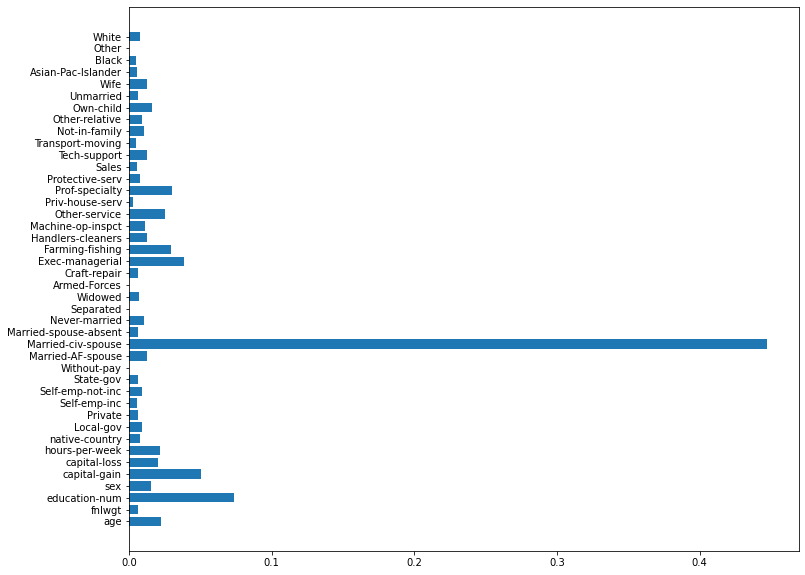

In [132]:
#Features with importance are plotted
plt.figure(figsize=(12,10))
plt.barh(X_scaled.columns, xgb_model1.feature_importances_)

In [129]:
y_pred=xgb_model1.predict(x_test)

In [130]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.71      1834
           1       0.90      0.93      0.91      5707

    accuracy                           0.87      7541
   macro avg       0.83      0.80      0.81      7541
weighted avg       0.86      0.87      0.86      7541



In [131]:
print(confusion_matrix(y_test,y_pred))

[[1211  623]
 [ 380 5327]]


In [133]:
from tabulate import tabulate

In [134]:
df_model=pd.DataFrame({'Model_Name':['LogisticRegression','SGDClassfier(Hinge Loss)','DecisionTree','RandomForestClassifier','XGBoost'],
                      'Test Performance':[0.8510807585200901,0.8494894576316139,0.8566503116297574,0.8574459620739955,0.8669937674048535]})

In [136]:
print(tabulate(df_model, headers='keys', tablefmt='psql'))

+----+--------------------------+--------------------+
|    | Model_Name               |   Test Performance |
|----+--------------------------+--------------------|
|  0 | LogisticRegression       |           0.851081 |
|  1 | SGDClassfier(Hinge Loss) |           0.849489 |
|  2 | DecisionTree             |           0.85665  |
|  3 | RandomForestClassifier   |           0.857446 |
|  4 | XGBoost                  |           0.866994 |
+----+--------------------------+--------------------+
